IMPORTS

In [236]:
from collections import defaultdict
import os
import textract

import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import yake

from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


COUNTING FILES

In [198]:
path = "../tp4/datas/"
files = []
for name in os.listdir(path):
    if name.endswith(".txt"):
        files.append(name)
files = sorted(files)
len(files)

1631

FILES NAMES EXPLORER: EXAMPLE ON FIRST FILE

In [199]:
#fileName model
fileName = files [0]
type(fileName)

str

In [200]:
#split_method
fileName_split = fileName.split('_')
fileName_split

['KB', 'JB1051', '1925-10-31', '01-00002.txt']

In [201]:
#date_path
date = fileName_split[2]

#year_path
date_split = date.split('-')
year = date_split[0]

#convert year into decades
year[:3]
year[-1]
year[:3] + '0s'

'1920s'

SPLITTING FILES NAMES TO ACCESS NEWSLETTER NAME & DATE

In [202]:
all_years = [str(year) for year in range(1831, 1971)]

In [203]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_year = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_year [year] += 1
    else:
        print(f"Anomalous file: {f}")

COUNTING FILES BY NEWSLETTER NAME

In [204]:
#stat by newsletterName
print(f"Ce corpus comprend:")
print(f"- {count_newspapers ['JB838']} exemplaires du journal Le Soir")
print(f"- {count_newspapers ['JB638']} exemplaires de La Meuse")
print(f"- {count_newspapers ['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers ['JB555']} exemplaires de l'Indépendance Belge")
print(f"- {count_newspapers ['JB572']} exemplaires du Journal de Charleroi")
print(f"- {count_newspapers ['JB1051']} exemplaires du journal Le Drapeau rouge")
print(f"- {count_newspapers ['JB567']} exemplaires du Journal de Bruxelles")
print(f"- {count_newspapers ['JB729']} exemplaires du Vingtième Siècle")
print(f"- {count_newspapers ['JB773']} exemplaires du journal Vers l'Avenir")
print(f"- {count_newspapers ['JB837']} exemplaires du journal Le Peuple")
print(f"- {count_newspapers ['JB421']} exemplaires de l'Avenir du Luxembourg")
print(f"- {count_newspapers ['JB685']} exemplaires du journal Le Petit Bleu")
print(f"- {count_newspapers ['JB555A']} exemplaires de L'Indépendance Belge (édité en Angleterre)")

Ce corpus comprend:
- 883 exemplaires du journal Le Soir
- 210 exemplaires de La Meuse
- 107 exemplaires de La Libre Belgique
- 80 exemplaires de l'Indépendance Belge
- 64 exemplaires du Journal de Charleroi
- 58 exemplaires du journal Le Drapeau rouge
- 52 exemplaires du Journal de Bruxelles
- 52 exemplaires du Vingtième Siècle
- 51 exemplaires du journal Vers l'Avenir
- 37 exemplaires du journal Le Peuple
- 27 exemplaires de l'Avenir du Luxembourg
- 10 exemplaires du journal Le Petit Bleu
- 0 exemplaires de L'Indépendance Belge (édité en Angleterre)


COUNTING FILES BY DECADES

In [205]:
#stat by decades
print(f"Ce corpus comprend:")
print(f"- {count_decade['1830s']} fichiers pour la décennie 1830s")
print(f"- {count_decade['1840s']} fichiers pour la décennie 1840s")
print(f"- {count_decade['1850s']} fichiers pour la décennie 1850s")
print(f"- {count_decade['1860s']} fichiers pour la décennie 1860s")
print(f"- {count_decade['1870s']} fichiers pour la décennie 1870s")
print(f"- {count_decade['1880s']} fichiers pour la décennie 1880s")
print(f"- {count_decade['1890s']} fichiers pour la décennie 1890s")
print(f"- {count_decade['1900s']} fichiers pour la décennie 1900s")
print(f"- {count_decade['1910s']} fichiers pour la décennie 1910s")
print(f"- {count_decade['1920s']} fichiers pour la décennie 1920s")
print(f"- {count_decade['1930s']} fichiers pour la décennie 1930s")
print(f"- {count_decade['1940s']} fichiers pour la décennie 1940s")
print(f"- {count_decade['1950s']} fichiers pour la décennie 1950s")
print(f"- {count_decade['1960s']} fichiers pour la décennie 1960s")
print(f"- {count_decade['1970s']} fichiers pour la décennie 1970s")

missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Ce corpus comprend:
- 0 fichiers pour la décennie 1830s
- 0 fichiers pour la décennie 1840s
- 5 fichiers pour la décennie 1850s
- 9 fichiers pour la décennie 1860s
- 7 fichiers pour la décennie 1870s
- 30 fichiers pour la décennie 1880s
- 80 fichiers pour la décennie 1890s
- 146 fichiers pour la décennie 1900s
- 111 fichiers pour la décennie 1910s
- 177 fichiers pour la décennie 1920s
- 306 fichiers pour la décennie 1930s
- 192 fichiers pour la décennie 1940s
- 238 fichiers pour la décennie 1950s
- 316 fichiers pour la décennie 1960s
- 14 fichiers pour la décennie 1970s
Années manquantes: 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1861, 1864, 1865, 1870, 1871, 1872, 1876, 1877, 1883, 1885, 1915, 1916, 1917


EXPLORING DATAS WITH SIMPLE BARCHART

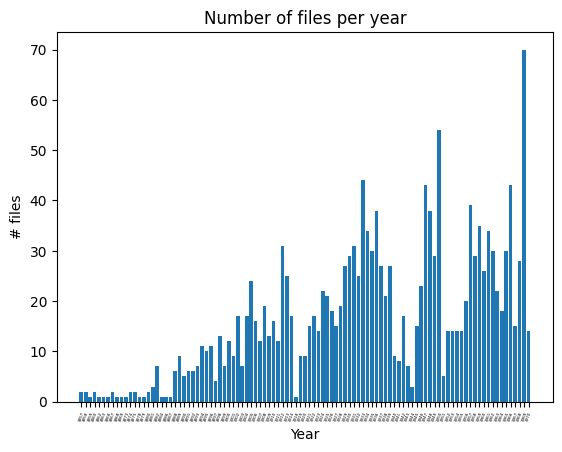

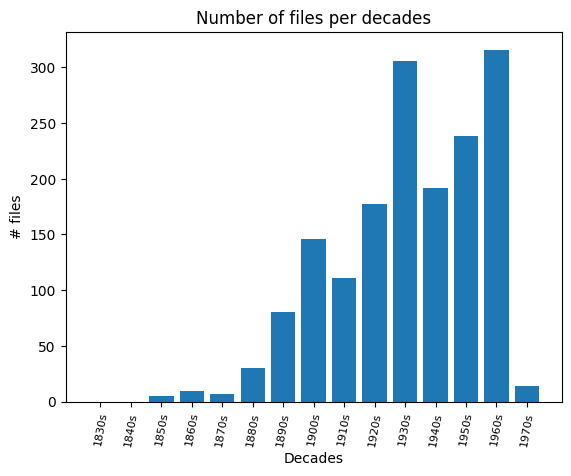

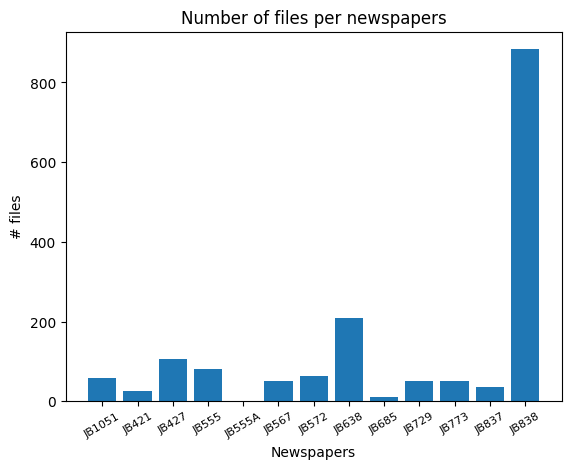

In [206]:
ordered_years = sorted(count_year.keys())
ordered_count_years = [count_year[year] for year in ordered_years]

index = np.arange(len(count_year))
plt.bar(index, ordered_count_years)
plt.xlabel('Year')
plt.ylabel('# files')
plt.xticks(index, ordered_years, fontsize=3, rotation=70)
plt.title('Number of files per year')
plt.show()

ordered_decades = sorted(count_decade.keys())
ordered_count_decades = [count_decade[decade] for decade in ordered_decades]

index = np.arange(len(count_decade))
plt.bar(index, ordered_count_decades)
plt.xlabel('Decades')
plt.ylabel('# files')
plt.xticks(index, ordered_decades, fontsize=8, rotation=80)
plt.title('Number of files per decades')
plt.show()

ordered_newspapers = sorted(count_newspapers.keys())
ordered_count_newspapers = [count_newspapers[newspaper] for newspaper in ordered_newspapers]

index = np.arange(len(count_newspapers))
plt.bar(index, ordered_count_newspapers)
plt.xlabel('Newspapers')
plt.ylabel('# files')
plt.xticks(index, ordered_newspapers, fontsize=8, rotation=30)
plt.title('Number of files per newspapers')
plt.show()

PUTTING THE FILES IN A BIG txt CORPUS CALLED "all.txt"

In [207]:
!cat ../tp4/datas/*.txt > ../tp4/all/all.txt

COUNTING WORDS IN all.txt

In [216]:
!wc ../tp4/all/all.txt

       0 10441576 64227435 ../tp4/all/all.txt


CREATING A STOPWORDS LIST

In [ ]:
sw = stopwords.words("french")
sw += ["afin", "aie", "ai", "ainsi", "allaient", "après", "au", "aux", "aussi", "auquel", "aura", "auront",
       "aux", "auxquels", "auxquelles", "avaient", "avais", "avait", "avec", "avoir", "ayant",
       "bien",
       "ça", "ceci", "cela", "celle", "celle-ci", "celle-là", "celui", "celui-ci", "celui-là", "cependant", "ces", "cet", "cette", 
       "ceux", "ceux-çi", "ceux-là", "chacun", "chaque", "chez", 
       "comme", "comment", "contre",
       "dans", "de", "delà", "depuis", "des", "dès", "desquels", "desquelles", "dire", "dit", "doit", "donc", "dont", "du", "duquel", "durant",
       "en", "encore", "entre", "environ", "est", "es", "étant", "être", "etc", 
       "faire", "fait", "faut", "feront", "font",
       "het",
       "ils",
       "jusqu", "jusque",
       "là", "la", "laquelle", "le", "lequel", "les", "lesquels", "lesquelles", "leur", "leurs", "lorsque", "lui",
       "mais", "malgré", "même", "mes", "mien", "miennes", "moins",
       "néanmoins", "non", "nos", "notre", "nôtre",
       "où", "ou", "outre",
       "parmi", "pas", "pendant", "peu", "peut", "plus",
       "quel", "quelle", "quelles", "quels", "quelques",
       "sans", "sauf", "se", "selon", "ses", "sous", "sur",
       "tel", "telle", "tels", "telles", "tien", "tienne", "tous", "tout", "toute", "toutes", "très", "trois",
       "une", "un",
       "van", "vers","vos", "vôtre", "vôtres"]
sw = set(sw)

In [ ]:
#get the sw list
print(f"{len(sw)} stopwords:\n {sorted(sw)}")


256 stopwords:
 ['afin', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'allaient', 'après', 'as', 'au', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celui', 'celui-ci', 'celui-là', 'cependant', 'ces', 'cet', 'cette', 'ceux', 'ceux-là', 'ceux-çi', 'chacun', 'chaque', 'chez', 'comme', 'comment', 'contre', 'd', 'dans', 'de', 'delà', 'depuis', 'des', 'desquelles', 'desquels', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'duquel', 'durant', 'dès', 'elle', 'en', 'encore', 'entre', 'environ', 'es', 'est', 'et', 'etc', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'fero

TOKENISATION

In [210]:
#get file's content
path = "../tp4/all/all.txt"

with open(path) as f:
    text = f.read()

In [211]:
#tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

14194332 words found


GET NUMBER OF DIFFERENT TERMS (VOCABULARY)

In [212]:
#GETTING RID OF SW & NON-ALPHABETICAL TERMS
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept")
print(f" > {len(voc)} different word forms")

5028877 words kept
 > 457819 different word forms


STATISTICS ON WORDS: MOST FREQUENT/ HAPAX/ LONGEST

In [213]:
#get most frequent words
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('deux', 15829),
 ('rue', 14199),
 ('ans', 10303),
 ('bruxelles', 10094),
 ('très', 9283),
 ('grand', 8534),
 ('heures', 8496),
 ('peu', 7787),
 ('prix', 7666),
 ('temps', 7563),
 ('autre', 7471),
 ('jour', 7184),
 ('pays', 7017),
 ('autres', 7004),
 ('quelques', 6654),
 ('terre', 6576),
 ('cours', 6472),
 ('grande', 6454),
 ('paris', 6270),
 ('lieu', 6082),
 ('soir', 6076),
 ('lune', 6075),
 ('mois', 6032),
 ('belgique', 5993),
 ('premier', 5517),
 ('avant', 5499),
 ('jours', 5412),
 ('francs', 5313),
 ('vie', 5264),
 ('point', 5245)]

In [214]:
#get hapax
fdist.hapaxes()[:30]

['mmlll',
 'tmtmw',
 'wiiot',
 'ttiipiffi',
 'vnsoelea',
 'tooêpbé',
 'rlérido',
 'totée',
 'iioii',
 'ôbro',
 'prévaricateur',
 'démasquée',
 'tohéha',
 'ausso',
 'révooation',
 'judieaires',
 'malheurcaix',
 'sorvile',
 'concussionnaire',
 'dénonceront',
 'jrstico',
 'aooompojraé',
 'dtsconto',
 'appmséa',
 'pinances',
 'commtri',
 'qjé',
 'eauso',
 'ristournés',
 'toumo']

In [215]:
#get longest words
n = 50
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiuiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiililiiiiiiiiiiiiiiiiiiiiii',
 'lllllllllllllllllllllllilillllllllllllllllllllllllillllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllilllllllllllllllllllllllllllllllllllllm',
 'llllllülilllllllllllllllllllllllllllllllllllllllllllllilllllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllulllllllllllllllllllllllllli',
 'lllllllllllllllllillllllllllllllllllllllmiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiii',
 'illlllllllllllllilllillllltlllltllllllllllllllllllellllllllllllllllllllllelllllllllllllltllllllllltilltllllllllllllllllllllllllllllllllllllllllllllllllllll',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii

EXTRACTING KW: INSTANTIATION/ LISTING FILES

In [217]:
#instantiate the kw extractor
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [218]:
#listing files
data_path = "../tp4/datas"
files = os.listdir(data_path)

for fileName in files:
    if fileName.endswith("DS_Store"):
        print(f"Anomalous file: {fileName}")

Anomalous file: .DS_Store


In [219]:
#print nbr of identified files
len(files)

1632

EXTRACTING KW ON ONE FILE

In [220]:
#choosing a file
this_file = files[1]
this_file

'KB_JB838_1950-03-20_01-00004.txt'

In [221]:
#get file's text
text = open(os.path.join(data_path,this_file), 'r').read()
text[:500]

'4 LE sçm LUNDI 20 MARS 1950 LA VIE DANS LE PA YS ANVERS Départ vers le Congo Le navire « Mar del Plata » quittera le port à destination de Matadi mardi 21 mars. L’embarquement des passagers aura Heu au n* 214 des bassins, à 15 heures et non à 8 h. 30. BRUGES C A la mémoire de Joseph Muylle Une cérémonie s’est déroulée, dimanche midi, au Palais de justice, à la mémoire de l’ayoeat Muylle, major honoraire de réserve. On notait la présence du gouverneur van Outrvve d’Ydewalle, du général Duthoit, d'

In [222]:
#extracTing kw from this text
keywords = kw_extractor.extract_keywords(text)
keywords

[('Mar del Plata', 0.003997819280971551),
 ('LUNE', 0.007893900101031439),
 ('van', 0.009437842886725632),
 ('rue', 0.010371541629592522),
 ('LUNE PASCALE', 0.013715105806637986),
 ('Liège', 0.014155788852577733),
 ('ville', 0.014173727633251285),
 ('Matadi mardi', 0.01544645664106835),
 ('del Plata', 0.015460008724239872),
 ('destination de Matadi', 0.01550091391909344),
 ('MARS', 0.016119358663679306),
 ('ans', 0.016756666358287042),
 ('dimanche', 0.019917217129695627),
 ('s’est', 0.021143242646999755),
 ('d’un', 0.02116334711897629),
 ('Van Ackere', 0.023852013942768664),
 ('président', 0.02472861331593629),
 ('Joseph Muylle', 0.025496665302728087),
 ('pleine lune', 0.02559775696108791),
 ('général', 0.025921783184571716),
 ('bourgmestre', 0.027260025036460293),
 ('travaux', 0.02743220408865043),
 ('cours', 0.02806259611719105),
 ('Samedi', 0.03019377951413388),
 ('Mgr Van Waeyenbergh', 0.03028109893869179),
 ('Dimanche matin', 0.034136365850407226),
 ('Samedi soir', 0.0342750574236

In [223]:
#keeping the bi-grams only
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['LUNE PASCALE',
 'Matadi mardi',
 'del Plata',
 'Van Ackere',
 'Joseph Muylle',
 'pleine lune',
 'Dimanche matin',
 'Samedi soir',
 'directeur général',
 'ANVERS Départ',
 'Van Gogh',
 'cours d’une',
 'Mgr Van']

EXTRACTING KW FROM ALL FILES

In [224]:
#extracting kw from all files
for f in sorted(files):
    if f.endswith(".txt"):
        print(f)
        text = open(os.path.join(data_path, f), 'r').read()
        keywords = kw_extractor.extract_keywords(text)
        kept = []
        for kw, score in keywords:
            words = kw.split()
            if len(words) == 2:
                kept.append(kw)
        print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB1051_1925-10-31_01-00002.txt
KB_JB1051_1925-10-31_01-00002.txt mentions these keywords: Van Overstraeten, novembre Orateur, Directeur Général, vieux mineur, Tramways Liégeois, Camille Joset, charbon qu'il...
KB_JB1051_1927-03-17_01-00004.txt
KB_JB1051_1927-03-17_01-00004.txt mentions these keywords: local habituel, Louis Henrunit, BRUXELLES RAYON, mars Temps, Emile Marchand, nouveau local, parti communiste, Urne oolllision, mars STATION, MARS MONNAIE...
KB_JB1051_1928-05-10_01-00004.txt
KB_JB1051_1928-05-10_01-00004.txt mentions these keywords: DBAWÎATJ BOT, Jardin Zoologique, niser l'installation, Vie Politique, local habituel, habituel RAYON, grandes expéditions, Jeunesses Communistes, Communiste FEDERATION, Mouvement Ouvrier, Voie Lactée...
KB_JB1051_1929-02-01_01-00004.txt
KB_JB1051_1929-02-01_01-00004.txt mentions these keywords: Maurice Tourneur, Joseph Kessel, local habituel, réalisateur Maurice, heures précises, Cinématographique Européenne, ASSEMBLEE GENERALE, DRAPEAU ROU

KeyboardInterrupt: 

EXTRACTING KW ON all.txt

In [231]:
# Lister les Fichiers
data_path = "../tp4/all"
files = os.listdir(data_path)

for fileName in files:
    if fileName.endswith("DS_Store"):
        print(f"Anomalous file: {fileName}")

Anomalous file: .DS_Store


In [232]:
len(files)
files

['all.txt', '.DS_Store']

In [233]:
this_file = files[0]
this_file

'all.txt'

In [234]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path,this_file), 'r').read()
text[:500]

".'■ HE! WW.'i I MMlll l Wil l lMJ i iH'-g-H tMTMW*lItr «ouoi i ' tai.i i 'ji'WiiOT' i' ttiipiffi'.i'^ lions, en même temps qu'il y combinait VI o fructueuses ut faire* de publicité et de presse! S. M. .Vnsoelea cédé aux instances dos pu i* sait ta protecteurs et des puissantes protectrices de M. Joset, si M. Anseele o tooêpbé de jouer la comédie de la remise lu dossier au parquet afin que celui-ci rlérido dos sanctions quo comportent lea totée délictueux du directeur d'adminis- ta.i*iioii Joset,"

In [235]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('Société royale belge', 1.815031905376956e-07),
 ('Monsieur Jean VAN', 1.880312837721939e-07),
 ('RUE ROYALE FRANCE', 2.4219091350094683e-07),
 ('Congo belge', 2.849523969199073e-07),
 ('cours d’une conférence', 2.8772810806922426e-07),
 ('Cie Congo Belge', 2.9135465864335316e-07),
 ('BELGIQUE BRUXELLES français', 2.9245955170790866e-07),
 ('Bruxelles', 3.087257806243034e-07),
 ('BRUXELLES Vendredi BRUXELLES', 3.609851700488988e-07),
 ('rue Jules Van', 3.61646076067992e-07),
 ('Cours jour Mars', 3.6212257178616587e-07),
 ('rue Jean Van', 4.050487712347595e-07),
 ('Paris Paris', 4.854979301984312e-07),
 ('Belgique Hollande Italie', 5.335487792668244e-07),
 ('Société France Belge', 5.502505451757981e-07),
 ('York Belgique Hollande', 5.772560259153339e-07),
 ('MONSIEUR JOSEPH VAN', 5.900058779505061e-07),
 ('Bruxelles Miss Belgique', 6.096253443293359e-07),
 ('MADAME Jean Van', 6.681350400875306e-07),
 ('roi Léopold III', 6.8800168186743e-07),
 ('BRUXELLES LIBRE BELGIQUE', 6.90320893076

In [237]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Congo belge',
 'Paris Paris',
 'BRUXELLES Paris',
 'rue Van',
 'Nouvelle Lune',
 'rue Royale',
 'Société Belge',
 'Grand Prix',
 'Jean Van',
 'jeune homme']

WORDCLOUDS ON SPECIFIC YEARS

In [ ]:
#sw list
sw = stopwords.words("french")
sw += [#sw for all contexts:
       # déterminants et pronoms
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "le", "leurs",
       "les", "plusieurs", "quelques", "toutes",

       # abréviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp",

       # divers
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi",

       #//////////////////////////////////////////////////////////////////////////
       #sw by specific contexts:
       # météo et temporalité
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi",

       #immobilier petites annonces
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine",

       # villes et lieux belges
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", 

       #job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
       
sw = set(sw)

In [ ]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../all/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))